# Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load Images

In [2]:
img1 = cv2.imread('wp2610643.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('808683.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

## Displaying Images

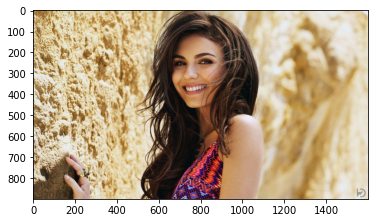

In [3]:
plt.imshow(img1)

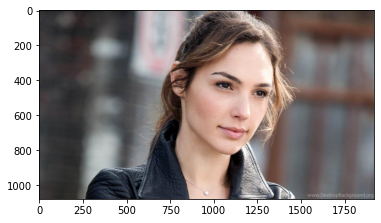

In [4]:
plt.imshow(img2)

In [5]:
img1.shape

(900, 1600, 3)

In [6]:
img2.shape

(1080, 1920, 3)

## Blending Images of the Same Size

#### Resizing of images

In [7]:
img1 = cv2.resize(img1,(800,800))
img2 = cv2.resize(img2,(800,800))

## Display Resized Images

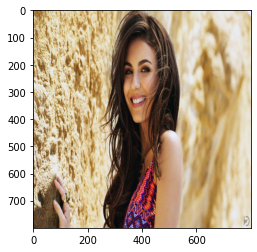

In [8]:
plt.imshow(img1)

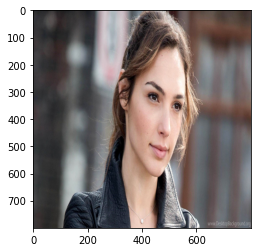

In [9]:
plt.imshow(img2)

#### Blended Image

In [10]:
blended = cv2.addWeighted(src1 = img1,alpha=0.5,src2=img2,beta=0.5,gamma=0)

## Display Blended Image

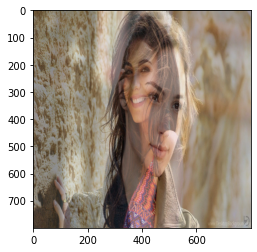

In [11]:
plt.imshow(blended)

### Here we have done manipulation with images 

In [12]:
blended = cv2.addWeighted(src1 = img1,alpha=0.5,src2=img2,beta=0.1,gamma=0)

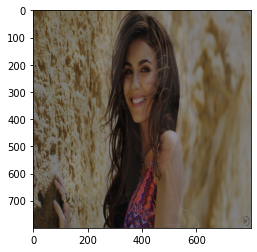

In [13]:
plt.imshow(blended)

### Overlay of small image on top of large image(**NO BLENDING**)

#### Numpy Reassignment

In [14]:
img1 = cv2.imread('wp2610643.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('808683.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [15]:
img2 = cv2.resize(img2,(800,800))

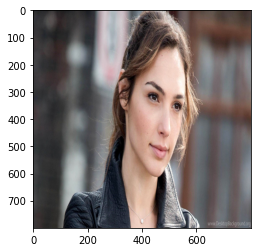

In [16]:
plt.imshow(img2)

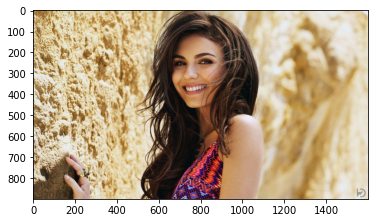

In [17]:
plt.imshow(img1)

In [18]:
large_img = img1
small_img = img2

In [19]:
x_offset = 0
y_offset = 0

In [20]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

small_img.shape

In [21]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

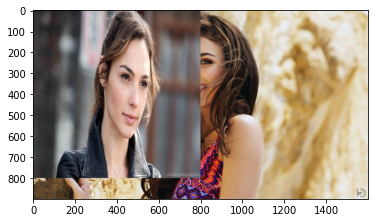

In [22]:
plt.imshow(large_img)

### Blending Images of Different Sizes

In [23]:
img1 = cv2.imread('wp2610643.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('808683.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [24]:
img2 = cv2.resize(img2,(800,800))

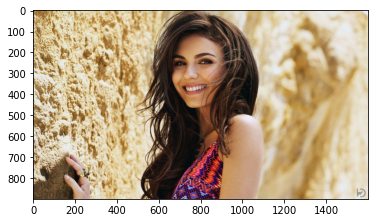

In [25]:
plt.imshow(img1)

In [26]:
img1.shape

(900, 1600, 3)

In [27]:
x_offset = 1600 - 800
y_offset = 900 - 800

In [28]:
img2.shape

(800, 800, 3)

In [29]:
rows,cols,channels = img2.shape ## Tuple unpacking

In [30]:
rows

800

In [31]:
cols

800

In [32]:
channels

3

## Region of Interest(roi)

In [33]:
## ROI ------> REGION OF INTEREST-------> roi---------> region of interest
roi = img1[y_offset:900,x_offset:1600]

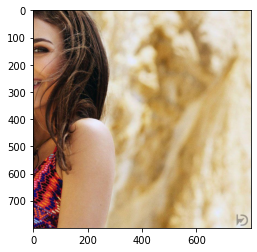

In [34]:
plt.imshow(roi)

In [35]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

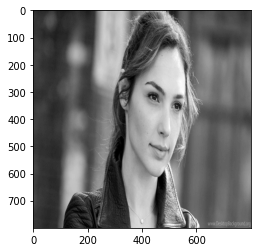

In [36]:
plt.imshow(img2gray,cmap='gray')

In [37]:
mask_inv = cv2.bitwise_not(img2gray)

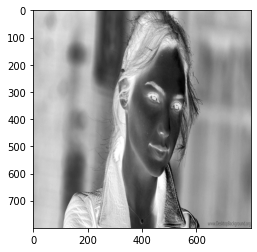

In [38]:
plt.imshow(mask_inv,cmap='gray')

In [39]:
mask_inv.shape ## NO COLOR CHANNEL

(800, 800)

#### Adding Color Channel

In [40]:
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [41]:
white_background.shape

(800, 800, 3)

In [42]:
white_background

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [43]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [44]:
bk.shape

(800, 800, 3)

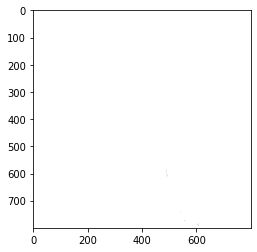

In [45]:
plt.imshow(bk)

In [46]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

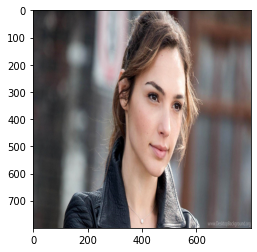

In [47]:
plt.imshow(fg)

In [48]:
final_roi = cv2.bitwise_or(roi,fg)

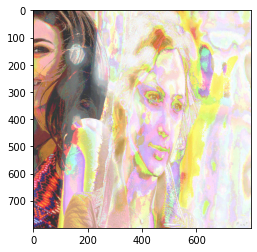

In [49]:
plt.imshow(final_roi)

# Great Job!